In [18]:
# Import necessary libraries
import matplotlib
import squarify
import time
import os
import re
import networkx as nx
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mpl_toolkits.mplot3d import Axes3D


In [19]:
with open(r'C:\Users\Admin\OneDrive\Máy tính\Projects\fpgrowth\dataset\groceries.csv') as file:
  df = pd.read_csv(file)

In [20]:
# Dataset
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [21]:
# Shape of the dataset
df.shape

(38765, 3)

In [22]:
# General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [23]:
# Rename the name of the columns for convenience
colnames = ['uid', 'date', 'items']
df = df.set_axis(labels=colnames, axis=1)
df

,uid,date,items
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [24]:
# Create corresponding dataframe for transactions
transactions_df = pd.DataFrame(data=df[['uid', 'date']], columns=df.columns)
transactions_df['items'] = df['items'].transform(lambda x: [x])
transactions_df = transactions_df.groupby(['uid', 'date']).sum()
print(transactions_df.shape)
transactions_df

(14963, 1)


items
uid  date                                                         
1000 15-03-2015  [sausage, whole milk, semi-finished bread, yog...
     24-06-2014                  [whole milk, pastry, salty snack]
     24-07-2015                     [canned beer, misc. beverages]
     25-11-2015                        [sausage, hygiene articles]
     27-05-2015                         [soda, pickled vegetables]
...                                                            ...
4999 24-01-2015  [tropical fruit, berries, other vegetables, yo...
     26-12-2015                             [bottled water, herbs]
5000 09-03-2014                    [fruit/vegetable juice, onions]
     10-02-2015       [soda, root vegetables, semi-finished bread]
     16-11-2014                   [bottled beer, other vegetables]

[14963 rows x 1 columns]

In [25]:
num_of_customers = len(list(set(df['uid'].values)))
num_of_items = len(list(set(df['items'].values)))
num_of_transactions = transactions_df.shape[0]

# Number of customers, items, and transactions
print(f'Total number of customers: {num_of_customers}')
print(f'Total number of items: {num_of_items}')
print(f'Total number of transactions: {num_of_transactions}')

Total number of customers: 3898
Total number of items: 167
Total number of transactions: 14963


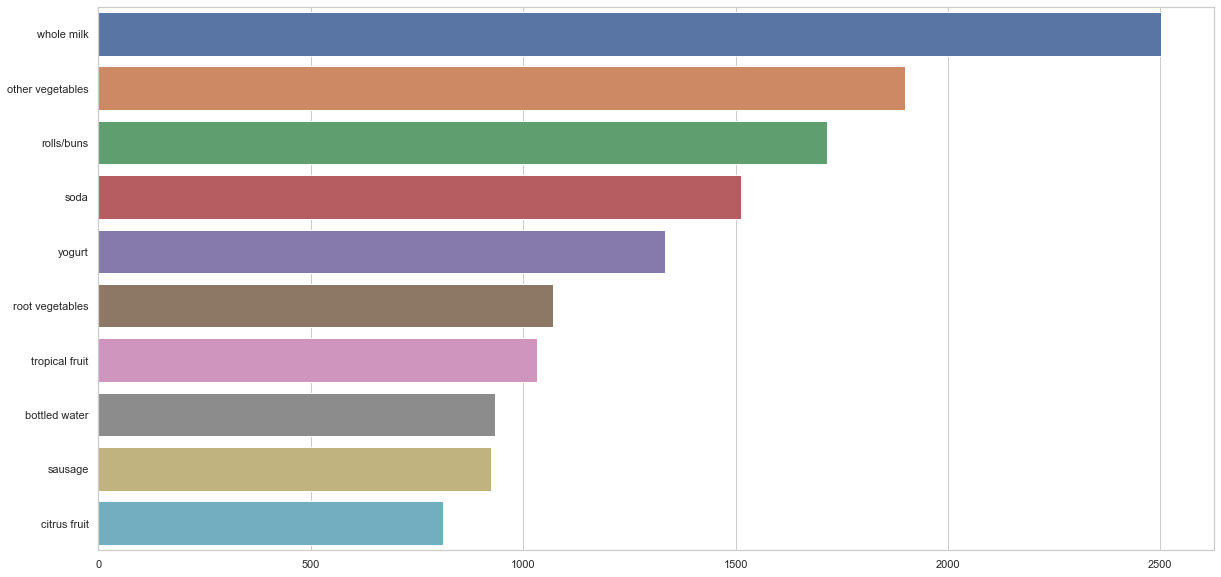

In [26]:
# Top ten best-seller items
top_ten_items = df['items'].value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(20, 10))
s = sns.barplot(x=top_ten_items.values, y=top_ten_items.index)

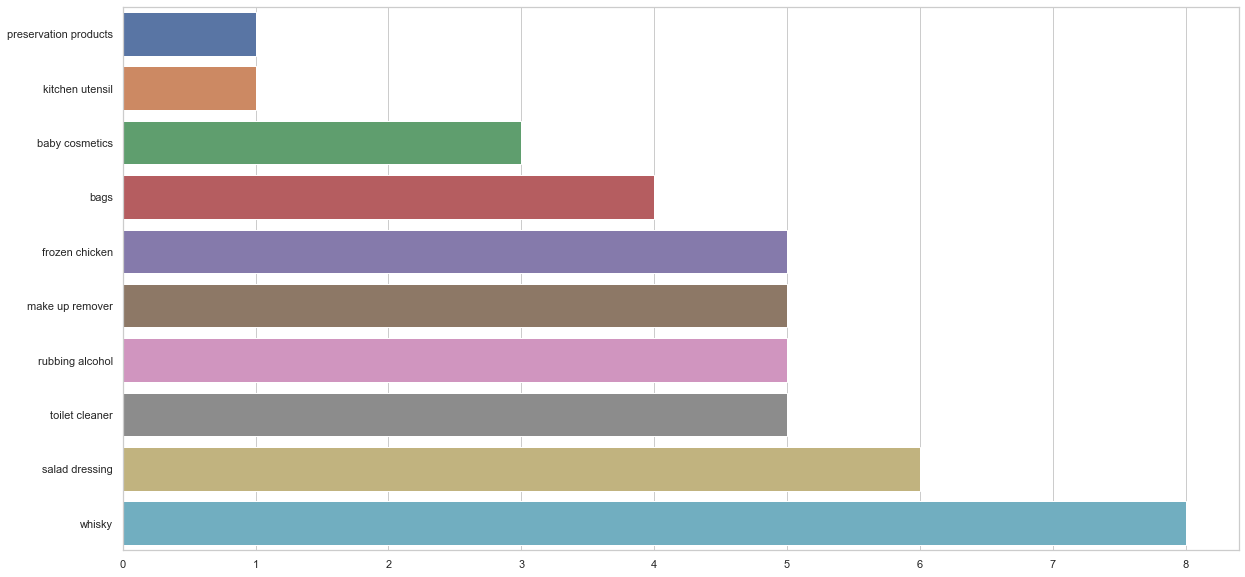

In [27]:
# Bottom ten least sold items
bottom_ten_items = df['items'].value_counts().sort_values(ascending=True)[:10]
plt.figure(figsize=(20, 10))
s = sns.barplot(x=bottom_ten_items.values, y=bottom_ten_items.index)

In [28]:
# Transform the dataset into a spare matrix

transactions = transactions_df['items']
transactions = transactions.droplevel(0)

enc = TransactionEncoder()
transactions = pd.DataFrame(enc.fit(transactions).transform(transactions), columns=enc.columns_)
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Generate frequent itemsets
frequent_itemsets = fpgrowth(transactions, min_support= 6/len(df), use_colnames=True, max_len = 2)
frequent_itemsets

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.009490,(semi-finished bread)
4,0.051728,(pastry)
...,...,...
3040,0.000200,"(butter, nuts/prunes)"
3041,0.000200,"(cream cheese , nuts/prunes)"
3042,0.000200,"(root vegetables, nuts/prunes)"
3043,0.000200,"(soap, berries)"


In [30]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(semi-finished bread),(salty snack),0.009490,0.018780,0.000334,0.035211,1.874969,0.000156,1.017031
1,(salty snack),(semi-finished bread),0.018780,0.009490,0.000334,0.017794,1.874969,0.000156,1.008454
2,(semi-finished bread),(sliced cheese),0.009490,0.014035,0.000267,0.028169,2.007109,0.000134,1.014544
3,(sliced cheese),(semi-finished bread),0.014035,0.009490,0.000267,0.019048,2.007109,0.000134,1.009743
4,(semi-finished bread),(napkins),0.009490,0.022121,0.000468,0.049296,2.228437,0.000258,1.028584
...,...,...,...,...,...,...,...,...,...
763,(nuts/prunes),(cream cheese ),0.002205,0.023658,0.000200,0.090909,3.842578,0.000148,1.073976
764,(soap),(berries),0.001337,0.021787,0.000200,0.150000,6.884816,0.000171,1.150839
765,(berries),(soap),0.021787,0.001337,0.000200,0.009202,6.884816,0.000171,1.007939
766,(yogurt),(specialty vegetables),0.085879,0.000735,0.000200,0.002335,3.175734,0.000137,1.001603


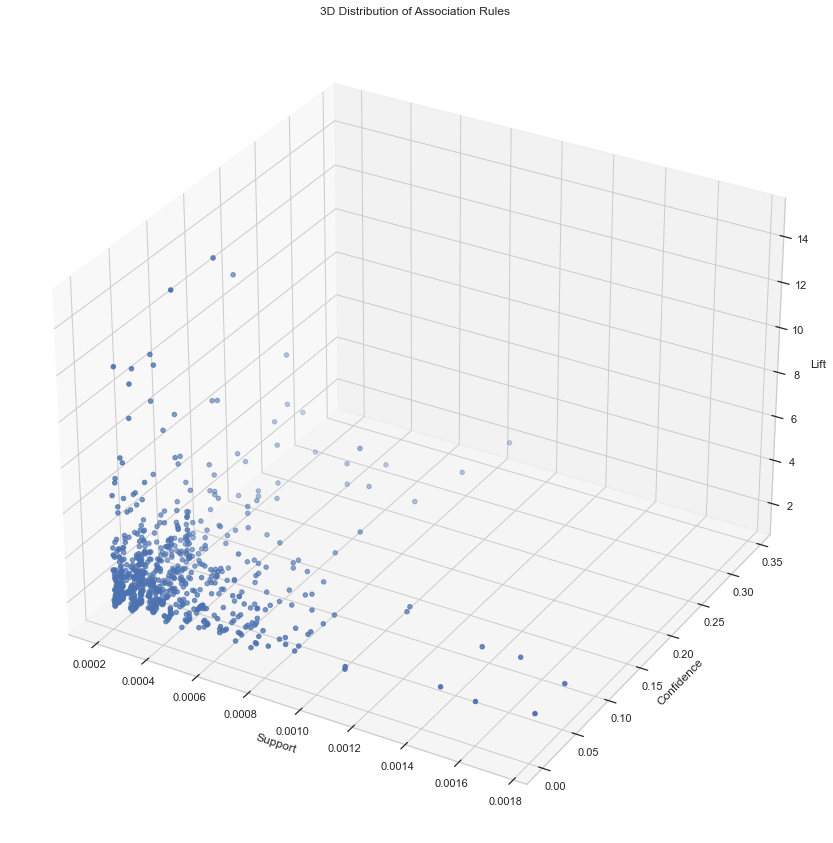

In [31]:
# Plot a 3D scatter for the association rules
sns.set(style='whitegrid')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')

ax.scatter(x, y, z)
ax.set_title('3D Distribution of Association Rules')

plt.show()

In [32]:
# Add a new column "rule" to the dataframe for convenience
rules['rule'] = rules['antecedents'].transform(lambda x: str(set(x))) + ' -> ' + rules['consequents'].transform(lambda x: str(set(x)))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
0,(semi-finished bread),(salty snack),0.009490,0.018780,0.000334,0.035211,1.874969,0.000156,1.017031,{'semi-finished bread'} -> {'salty snack'}
1,(salty snack),(semi-finished bread),0.018780,0.009490,0.000334,0.017794,1.874969,0.000156,1.008454,{'salty snack'} -> {'semi-finished bread'}
2,(semi-finished bread),(sliced cheese),0.009490,0.014035,0.000267,0.028169,2.007109,0.000134,1.014544,{'semi-finished bread'} -> {'sliced cheese'}
3,(sliced cheese),(semi-finished bread),0.014035,0.009490,0.000267,0.019048,2.007109,0.000134,1.009743,{'sliced cheese'} -> {'semi-finished bread'}
4,(semi-finished bread),(napkins),0.009490,0.022121,0.000468,0.049296,2.228437,0.000258,1.028584,{'semi-finished bread'} -> {'napkins'}


In [38]:
# Plot a interactive 3D scatter of association rules
scatter_fig = px.scatter_3d(rules.sort_values(by=['confidence'], ascending=False)[:10], x='support', y='confidence', z='lift', color='rule')
scatter_fig.show()

In [34]:
# This equals to whole_milk_rules = rules[rules['consequants'] == {'whole milk'}]
# Select assocation rules in which "whole milk is the consequent"
whole_milk_rules = rules[rules['consequents'].astype(str).str.contains('whole milk')]
whole_milk_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
98,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523,{'softener'} -> {'whole milk'}
508,(house keeping products),(whole milk),0.003007,0.157923,0.000735,0.244444,1.547872,0.000260,1.114514,{'house keeping products'} -> {'whole milk'}
614,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868,{'artif. sweetener'} -> {'whole milk'}
706,(ready soups),(whole milk),0.001002,0.157923,0.000267,0.266667,1.688588,0.000109,1.148287,{'ready soups'} -> {'whole milk'}
710,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,{'brandy'} -> {'whole milk'}
719,(light bulbs),(whole milk),0.001938,0.157923,0.000468,0.241379,1.528463,0.000162,1.110011,{'light bulbs'} -> {'whole milk'}
727,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,{'syrup'} -> {'whole milk'}
732,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,{'canned fruit'} -> {'whole milk'}


In [35]:
# Infer from the rules
whole_milk_rules = whole_milk_rules.sort_values(by=['lift'], ascending=False).reset_index(drop=True)
whole_milk_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,{'brandy'} -> {'whole milk'}
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523,{'softener'} -> {'whole milk'}
2,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,{'syrup'} -> {'whole milk'}
3,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,{'canned fruit'} -> {'whole milk'}
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868,{'artif. sweetener'} -> {'whole milk'}
5,(ready soups),(whole milk),0.001002,0.157923,0.000267,0.266667,1.688588,0.000109,1.148287,{'ready soups'} -> {'whole milk'}
6,(house keeping products),(whole milk),0.003007,0.157923,0.000735,0.244444,1.547872,0.000260,1.114514,{'house keeping products'} -> {'whole milk'}
7,(light bulbs),(whole milk),0.001938,0.157923,0.000468,0.241379,1.528463,0.000162,1.110011,{'light bulbs'} -> {'whole milk'}
